In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [2]:
from subprocess import check_output
print(check_output(["ls", "../../resources/prices"]).decode("utf8"))

coin_Aave.csv
coin_BinanceCoin.csv
coin_Bitcoin.csv
coin_Cardano.csv
coin_ChainLink.csv
coin_Cosmos.csv
coin_CryptocomCoin.csv
coin_Dogecoin.csv
coin_EOS.csv
coin_Ethereum.csv
coin_Iota.csv
coin_Litecoin.csv
coin_Monero.csv
coin_NEM.csv
coin_Polkadot.csv
coin_Solana.csv
coin_Stellar.csv
coin_Tether.csv
coin_Tron.csv
coin_USDCoin.csv
coin_Uniswap.csv
coin_WrappedBitcoin.csv
coin_XRP.csv



## Load and inspect data

In [3]:
trx_df = pd.read_csv(Path('../../resources/prices/coin_Tron.csv'), index_col='SNo')
trx_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,TRON,TRX,2017-09-14 23:59:59,0.002479,0.001298,0.002006,0.001427,5.876970e+04,0.000000e+00
2,TRON,TRX,2017-09-15 23:59:59,0.001831,0.001091,0.001419,0.001801,2.647480e+04,0.000000e+00
3,TRON,TRX,2017-09-16 23:59:59,0.017671,0.001371,0.001815,0.001831,5.453470e+04,0.000000e+00
4,TRON,TRX,2017-09-17 23:59:59,0.003879,0.001781,0.001836,0.003320,1.249980e+05,0.000000e+00
5,TRON,TRX,2017-09-18 23:59:59,0.003438,0.002534,0.003324,0.003263,1.591580e+05,0.000000e+00
...,...,...,...,...,...,...,...,...,...
1259,TRON,TRX,2021-02-23 23:59:59,0.054399,0.038776,0.054364,0.044790,3.354812e+09,3.209605e+09
1260,TRON,TRX,2021-02-24 23:59:59,0.049737,0.043440,0.044817,0.048028,2.381929e+09,3.441673e+09
1261,TRON,TRX,2021-02-25 23:59:59,0.049908,0.045201,0.048018,0.045205,1.421733e+09,3.239386e+09


In [4]:
trx_df['Date'] = pd.to_datetime(trx_df['Date']).dt.date
trx_df['Date'] = pd.to_datetime(trx_df['Date'])
trx_df['Spread'] = trx_df.High - trx_df.Low
trx_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1263 entries, 1 to 1263
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       1263 non-null   object        
 1   Symbol     1263 non-null   object        
 2   Date       1263 non-null   datetime64[ns]
 3   High       1263 non-null   float64       
 4   Low        1263 non-null   float64       
 5   Open       1263 non-null   float64       
 6   Close      1263 non-null   float64       
 7   Volume     1263 non-null   float64       
 8   Marketcap  1263 non-null   float64       
 9   Spread     1263 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 108.5+ KB


## Plot the closing value of TRX over time

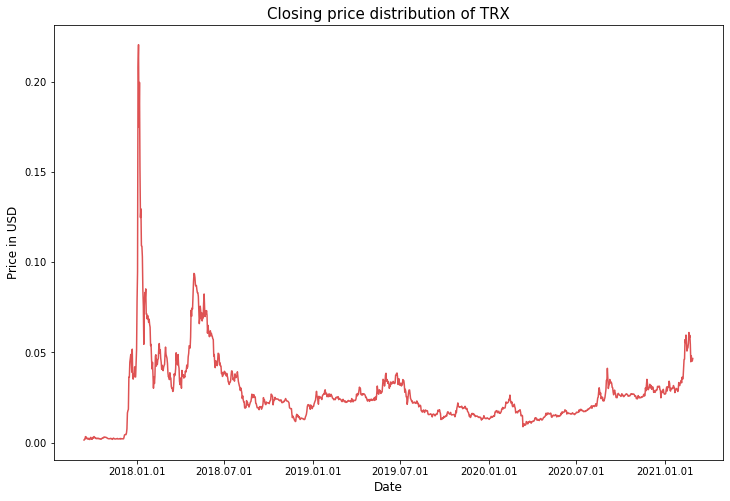

In [5]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))
# sns.lineplot(y = trx_df.Close.values, x=trx_df.Date_mpl.values, alpha=0.8, color=color[3])
sns.lineplot(y = trx_df.Close.values, x=trx_df.Date.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of TRX", fontsize=15)
plt.show()

## Candlestick chart

In [6]:
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
import mplfinance as mpf

trx_df['Date_mpl'] = trx_df['Date'].apply(lambda x: mdates.date2num(x))

temp_trx_df = trx_df.copy(deep=False)
temp_trx_df = temp_trx_df.set_index(['Date'])
temp_trx_df = temp_trx_df.drop(['Name', 'Symbol', 'Marketcap','Spread'], axis=1)
temp_trx_df

,High,Low,Open,Close,Volume,Date_mpl
Date,,,,,,
2017-09-14,0.002479,0.001298,0.002006,0.001427,5.876970e+04,17423.0
2017-09-15,0.001831,0.001091,0.001419,0.001801,2.647480e+04,17424.0
2017-09-16,0.017671,0.001371,0.001815,0.001831,5.453470e+04,17425.0
2017-09-17,0.003879,0.001781,0.001836,0.003320,1.249980e+05,17426.0
2017-09-18,0.003438,0.002534,0.003324,0.003263,1.591580e+05,17427.0
...,...,...,...,...,...,...
2021-02-23,0.054399,0.038776,0.054364,0.044790,3.354812e+09,18681.0
2021-02-24,0.049737,0.043440,0.044817,0.048028,2.381929e+09,18682.0
2021-02-25,0.049908,0.045201,0.048018,0.045205,1.421733e+09,18683.0


/Users/arttucker/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/mplfinance/_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


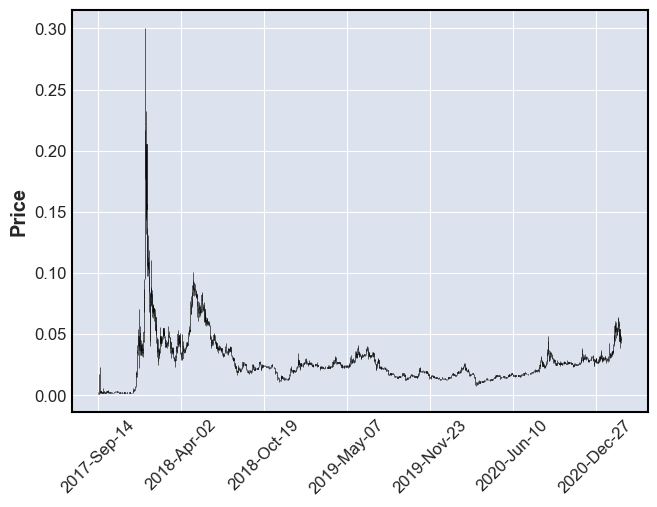

In [7]:
mpf.plot(temp_trx_df, type='candle')

## Price prediction

In [8]:
from fbprophet import Prophet

In [9]:
INPUT_FILE = "coin_Tron.csv"

price_predict_df = pd.read_csv("../../resources/prices/" + INPUT_FILE, parse_dates=['Date'], usecols=["Date", "Close"])
price_predict_df.columns = ["ds", "y"]

m = Prophet()
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
1288,2021-03-25 23:59:59,0.038838,0.022890,0.053837
1289,2021-03-26 23:59:59,0.039223,0.023868,0.054185
1290,2021-03-27 23:59:59,0.039532,0.024284,0.054747
1291,2021-03-28 23:59:59,0.039538,0.022764,0.054700
1292,2021-03-29 23:59:59,0.039460,0.023804,0.054308


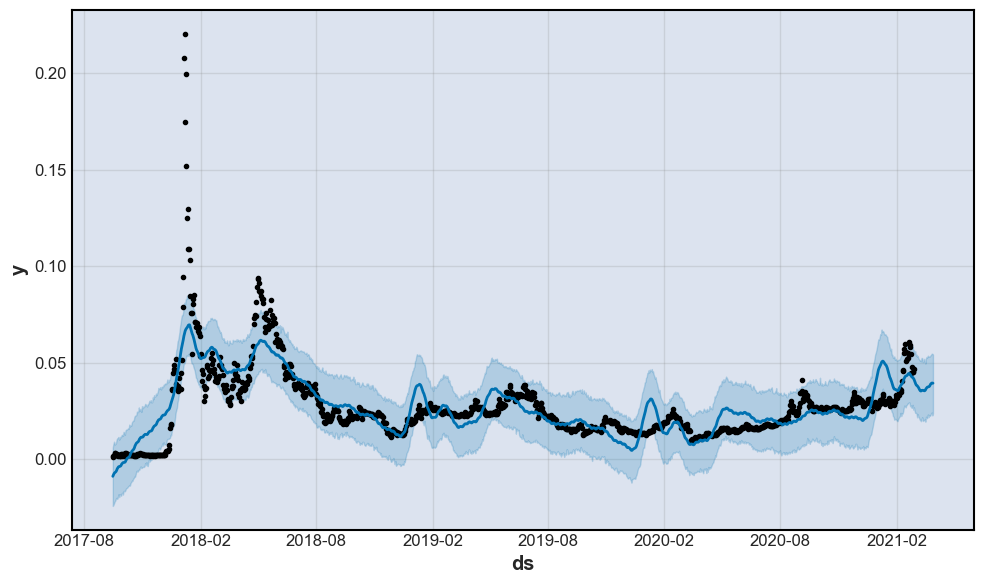

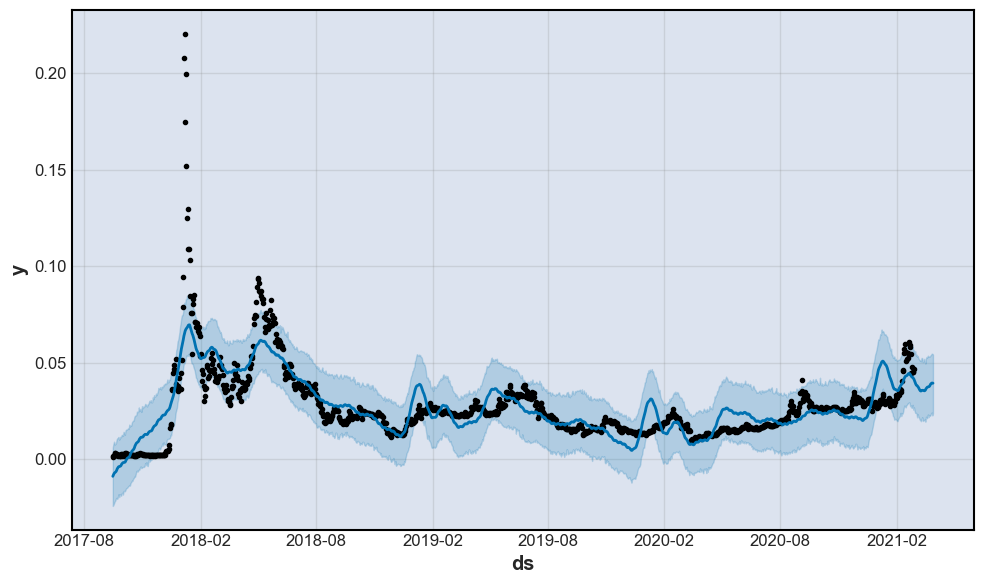

In [10]:
m.plot(forecast)

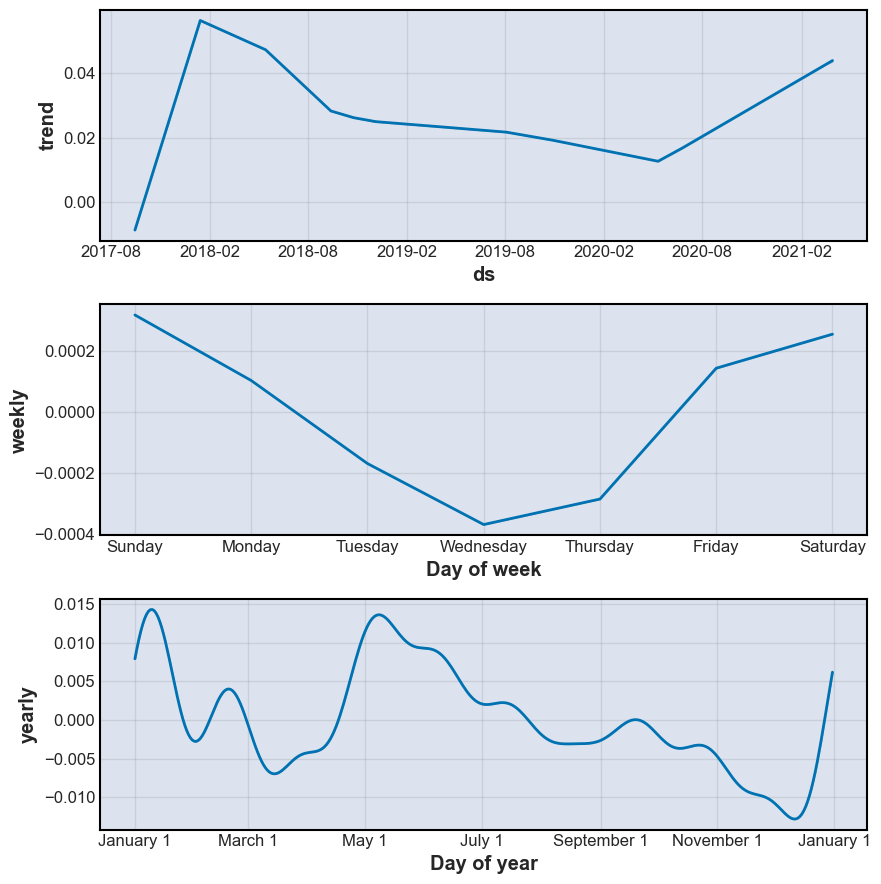

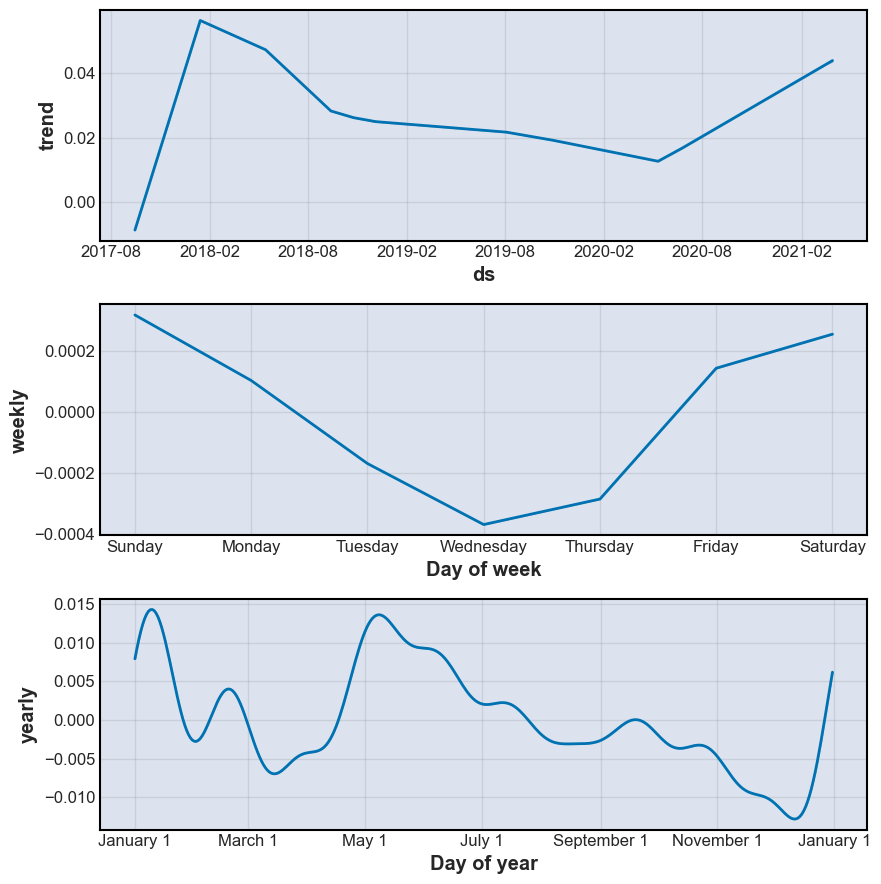

In [11]:
m.plot_components(forecast)